# A Short Report on Life Expectancy Around the World

<hr><hr><br><br>

## loading data from <a href = https://www.worldometers.info/demographics/life-expectancy/>this link </a>, Using scrap method in python!
<hr>


In [1]:
import requests  
import pandas as pd  
from bs4 import BeautifulSoup  

# URL of the website  
url = "https://www.worldometers.info/demographics/life-expectancy/"  

# Send a GET request to the website  
response = requests.get(url)  

# Check if the request was successful  
if response.status_code == 200:  
    # Parse the HTML content  
    soup = BeautifulSoup(response.text, 'html.parser')  

    # Find the table containing life expectancy data  
    table = soup.find('table', attrs={'class': 'table'})  

    # Get table headers  
    headers = []  
    for th in table.findAll('th'):  
        headers.append(th.text.strip())  

    # Get table rows  
    rows = []  
    for tr in table.findAll('tr')[1:]:  # Skip the header row  
        cells = tr.findAll('td')  
        row = [cell.text.strip() for cell in cells]  
        rows.append(row)  

    # Create a DataFrame  
    df = pd.DataFrame(rows, columns=headers)  

    # Save to Excel file  
    df.to_excel('life_expectancy.xlsx', index=False)  
    print("Data saved to 'life_expectancy.xlsx'")  
else:  
    print("Failed to retrieve data:", response.status_code)

Data saved to 'life_expectancy.xlsx'


## Get Head of data

In [2]:
df.head(20)

,#,Country,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy
0,1,Hong Kong,85.83,88.66,83.00
1,2,Macao,85.51,88.11,82.88
2,3,Japan,84.95,87.97,81.91
3,4,Switzerland,84.38,86.05,82.63
4,5,Singapore,84.27,86.42,82.13
5,6,Italy,84.20,86.13,82.15
6,7,South Korea,84.14,87.23,80.83
7,8,Spain,84.05,86.68,81.35
8,9,Malta,83.85,85.83,81.81
9,10,Australia,83.73,85.56,81.89


In [3]:
df.tail(10)

,#,Country,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy
191,192,Mali,60.03,61.41,58.70
192,193,Guinea,59.55,60.83,58.18
193,194,Namibia,59.53,63.13,55.98
194,195,Eswatini,57.71,61.86,53.98
195,196,Somalia,57.35,59.47,55.32
196,197,South Sudan,56.51,57.97,54.99
197,198,Central African Republic,55.48,57.68,53.38
198,199,Lesotho,54.91,57.82,52.12
199,200,Nigeria,53.87,54.24,53.51
200,201,Chad,53.68,55.41,52.01


<br>

## get continent of countries 
<hr>

In [4]:
import country_converter as coco  
df['Continent'] = coco.convert(df['Country'], to = 'continent')

In [5]:
df.head(10)

,#,Country,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy,Continent
0,1,Hong Kong,85.83,88.66,83.00,Asia
1,2,Macao,85.51,88.11,82.88,Asia
2,3,Japan,84.95,87.97,81.91,Asia
3,4,Switzerland,84.38,86.05,82.63,Europe
4,5,Singapore,84.27,86.42,82.13,Asia
5,6,Italy,84.20,86.13,82.15,Europe
6,7,South Korea,84.14,87.23,80.83,Asia
7,8,Spain,84.05,86.68,81.35,Europe
8,9,Malta,83.85,85.83,81.81,Europe
9,10,Australia,83.73,85.56,81.89,Oceania


In [6]:
df['Continent'].value_counts()

Continent
Africa     57
Asia       51
America    40
Europe     39
Oceania    14
Name: count, dtype: int64

<br><br>

## Get Mean values of Life Expectancy Group by Continents
<hr>

In [7]:
df.columns
df['both_sexes'] = list(map(lambda x: float(x), df['Life Expectancy  (both sexes)'].values))
df['Female'] = list(map(lambda x: float(x), df['Females  Life Expectancy'].values))
df['Male'] = list(map(lambda x: float(x), df['Males  Life Expectancy'].values))

In [8]:
result = df.groupby(['Continent']).agg({'both_sexes': lambda x: x.mean(), 
                                        'Female': lambda x: x.mean(), 
                                        'Male': lambda x: x.mean()})

In [9]:
result

,both_sexes,Female,Male
Continent,,,
Africa,64.917368,67.219123,62.668421
America,75.946250,79.001250,72.900250
Asia,75.475882,78.153137,72.885490
Europe,79.668974,82.431026,76.848462
Oceania,74.473571,77.107857,72.011429


<br><br>

## show results with RosePlot
<hr>

In [10]:
import matplotlib.pyplot as plt 
import numpy as np
dat2 = result.T

In [11]:
dat2['Continent'] = dat2.index 

In [12]:
dat_long = dat2.melt(id_vars = 'Continent', 
                   var_name = 'Continents', 
                   value_name = 'Mean_Life_Expectancy')
dat_long.rename(columns = {'Continent': 'Sex'}, inplace = True)
dat_long

,Sex,Continents,Mean_Life_Expectancy
0,both_sexes,Africa,64.917368
1,Female,Africa,67.219123
2,Male,Africa,62.668421
3,both_sexes,America,75.946250
4,Female,America,79.001250
5,Male,America,72.900250
6,both_sexes,Asia,75.475882
7,Female,Asia,78.153137
8,Male,Asia,72.885490
9,both_sexes,Europe,79.668974


In [13]:
Continents = list(dat_long['Continents'].unique())
Continents

['Africa', 'America', 'Asia', 'Europe', 'Oceania']

In [14]:
val_temp = dat_long['Mean_Life_Expectancy']
maxx = val_temp.max() 
minn = val_temp.min()
temp = np.linspace(minn, maxx, num = 100)
val_temp2 = pd.DataFrame(temp, columns = ['temp'])
tt = list(val_temp2.temp.quantile(q = [0, 0.2, 0.5, 0.75, 1]).values)

C:\Users\habib\AppData\Local\Temp\ipykernel_12612\366140113.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect = [4, 4, 0.5, 0.5])


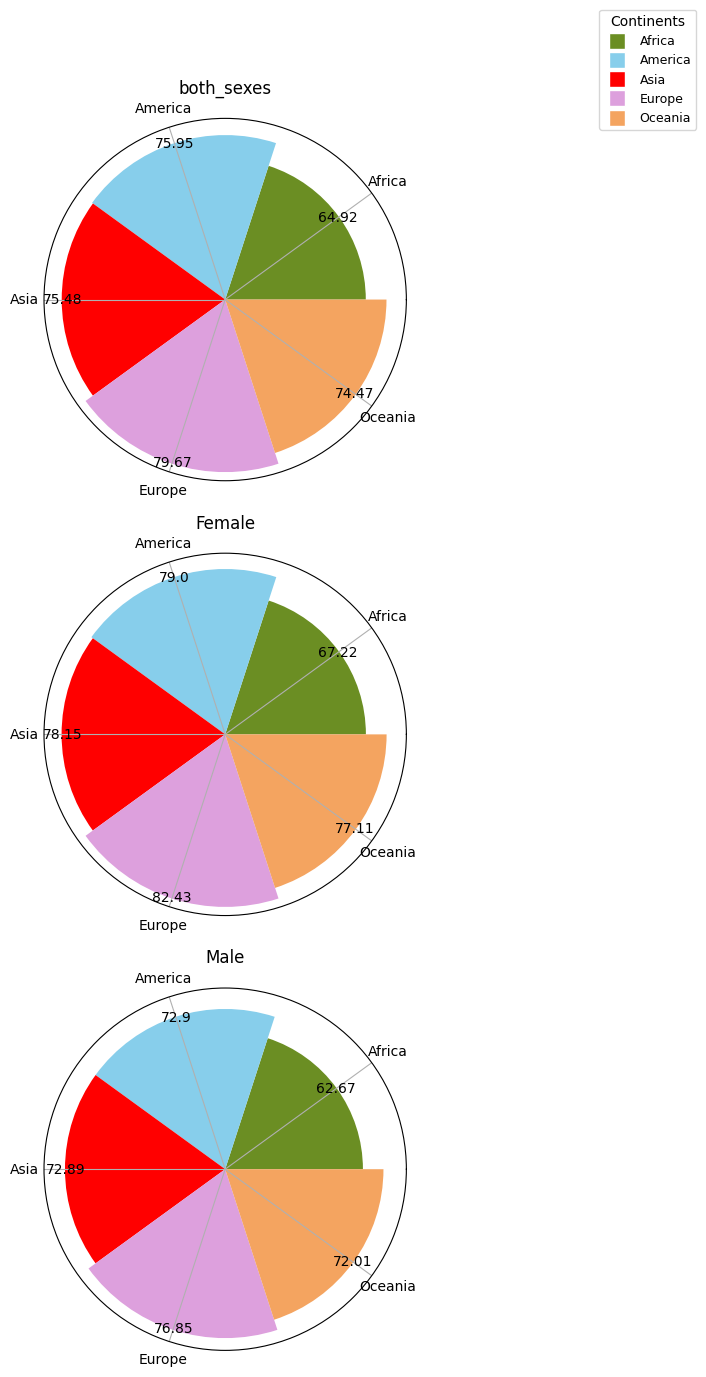

In [33]:
fig, ax = plt.subplots(3, 1, figsize = (16, 16), subplot_kw = dict(polar = True), ) 
SexTemp = list(dat_long['Sex'].unique())
colors = ['olivedrab', 'skyblue', 'red', 'plum', 'sandybrown']
widths = np.repeat(360/5, 5)
directions = np.linspace(36, 324, num = 5)
breaks = np.linspace(start = 36, stop = 360 - 36, num = 5)
# directions
# Levels
 
count = -1
 
for k in SexTemp: 
    count += 1    
    tempDat = dat_long[dat_long['Sex'] == k]
    val = tempDat['Mean_Life_Expectancy']
    for direction, width, color, value in zip(directions, widths, colors, val): 
        bars = ax[count].bar(np.radians([direction]), [value], width = np.radians([width]), 
                            bottom = 0.0, color = color)
        ax[count].text(np.radians(direction), value - 0.5, 
                str(round(value, 2)), ha='center', va='center', fontsize=10) 
        ax[count].set_yticks(tt)
        ax[count].set_yticklabels([])
        ax[count].tick_params(axis='y', which = 'both', 
                              grid_alpha = 0)
        ax[count].set_xticks(np.radians(list(breaks)))
        ax[count].set_xticklabels(list(Continents))
        ax[count].set_title(f"{k}")
 
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label = category, 
                            markerfacecolor = color, 
                            markersize=12) for category, color in zip(Continents, colors)]
ax[0].legend(legend_handles, 
          [handle.get_label() for handle in legend_handles], 
          loc = 'upper right', title = 'Continents', 
          bbox_to_anchor = (1.8, 1.3), fontsize = 9, 
          borderaxespad = 0.)
plt.tight_layout(rect = [4, 4, 0.5, 0.5])
plt.show()